In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# %matplotlib qt
%matplotlib inline

In [34]:
# Global functions

def apply_sobel_filter(img, kernel_size=3, thresh=(25, 200)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    gray = cv2.GaussianBlur(gray, (kernel_size * 3, kernel_size * 3), 0)
    gray = cv2.bilateralFilter(gray, kernel_size * 3 , thresh[0], thresh[1])
    
    sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return sxbinary


def apply_canny_filter(img, kernel_size=3, thresh=(50, 200)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return cv2.Canny(gray, thresh[0], thresh[1])

def apply_edge_filter(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobel = apply_sobel_filter(img)
    canny = apply_canny_filter(img)
    
    combined_binary = np.zeros_like(gray)
    combined_binary[ (sobel == 1) | (canny == 1) ] = 1
    return np.uint8(255 * combined_binary)
    


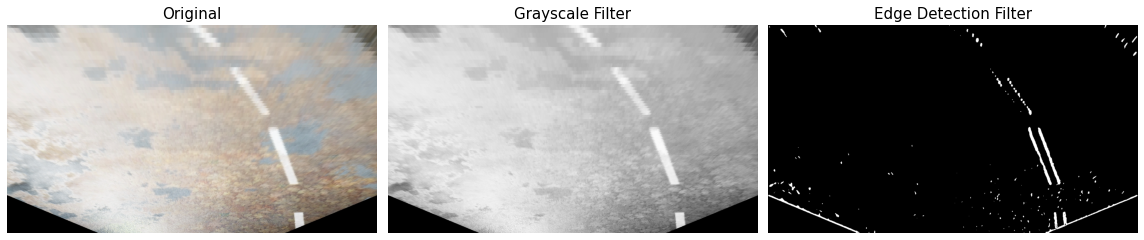

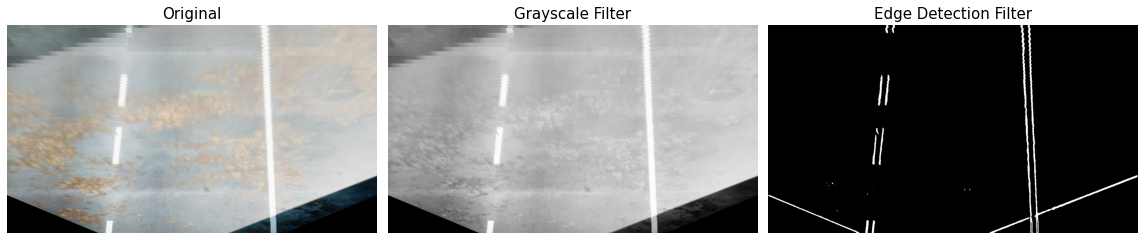

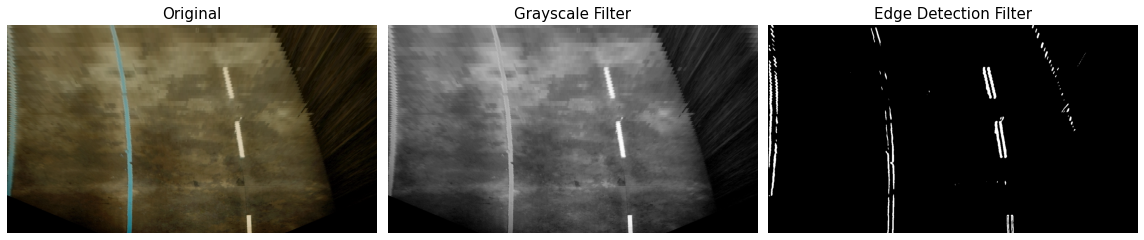

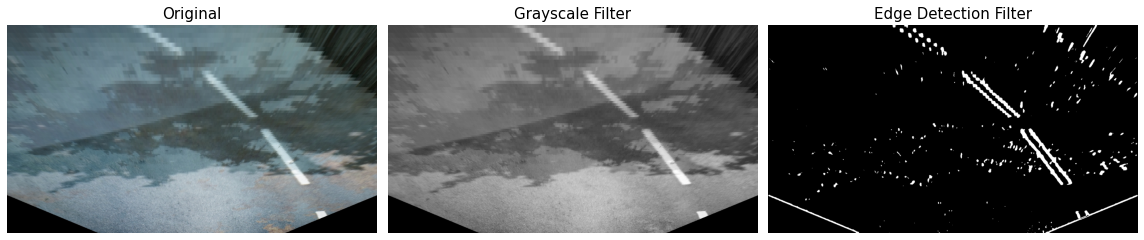

In [35]:
### get the test images from the test_images folder
images = glob.glob('./test*/lane_detection_image_perspective.jpg')


### Loop through each image and send it to the pipeline
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edge = apply_edge_filter(img)
    
    f, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(16, 12)) #
    ax1.imshow(img, cmap='gray')
    ax1.set_title('Original', fontsize=15)
    ax1.axis('off')
    ax2.imshow(gray, cmap='gray')
    ax2.set_title('Grayscale Filter', fontsize=15)
    ax2.axis('off')
    ax3.imshow(edge, cmap='gray')
    ax3.set_title('Edge Detection Filter', fontsize=15)
    ax3.axis('off')

    plt.tight_layout()